## 1. Setup and Load Data

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/home/daphe/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/home/daphe/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/home/daphe/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                            

In [2]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/f5/d0/2e455d894ec0d6527e662ad55e70c04f421ad83a6fd0a54c3dd73c411282/opencv_python-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01m


In [22]:
import tensorflow as tf

In [23]:
import os

In [24]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [9]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Removing the Dirty Images And Some Ploting

In [25]:
import cv2
import imghdr

In [2]:
!pip install imghdr

ERROR: Could not find a version that satisfies the requirement imghdr (from versions: none)
ERROR: No matching distribution found for imghdr


In [3]:
data_dir = 'data'

In [17]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [18]:
os.listdir(os.path.join(data_dir, 'happy'))

['images13.jpg',
 'hdptcar-fi-2.jpg',
 'images22.jpg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 'dv2051009.jpg',
 'smile.woman_.jpg',
 'friends-happy-190821.jpg',
 'Happy-Guy.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'compassion.jpg',
 'Happy.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg',
 'image28.jpeg',
 '_happy_jumping_on_beach-40815.jpg',
 'Happy-people-800x533.jpg',
 '2560px-Happy_People.jpg',
 'hand-drawn-happy-friends-jumping_23-2149095224.jpg',
 'happy-people-pexels-rodnae-productions-8927342.jpg',
 'images40.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'images24.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'happiness.jpg',
 'image15.jpeg',
 '56f455011e0000b300705475.jpeg',
 'business-p

In [26]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in the ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

libpng warning: iCCP: known incorrect sRGB profile


## Load Data


In [27]:
tf.data.Dataset??

In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 185 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [32]:
data_iterator


In [39]:
batch = data_iterator.next()

In [35]:
len(batch)


2

In [40]:
# Class 1 = Sad People
# Class 0 = Happy People
batch[1]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

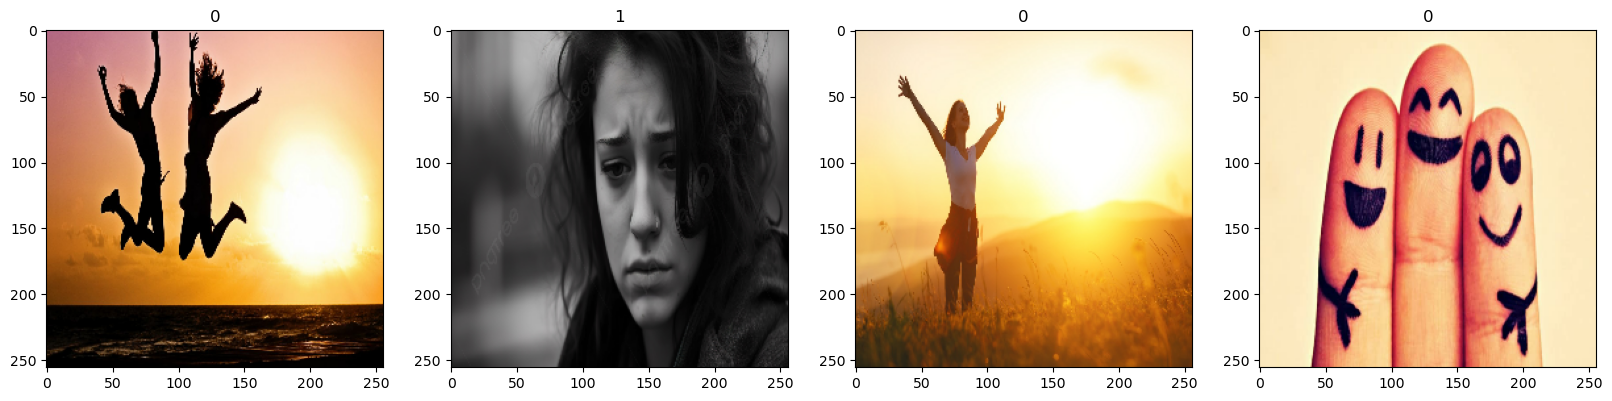

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

In [42]:
# Scale Data
data = data.map(lambda x, y: (x/255, y))

In [44]:
scaled_iterator = data.as_numpy_iterator()

In [48]:
batch = scaled_iterator.next()

In [51]:
# Split Data to Training, Test and Validate set
len(data)

6

In [56]:
train_count = int(len(data)*.7)
val_count = int(len(data)*.2)
test_count = int(len(data)*.1)+1

In [60]:
train = data.take(train_count)
val = data.skip(train_count).take(val_count)
test = data.skip(train_count+val_count).take(test_count)

In [61]:
len(test)

1

## Deep Learning Sequential Model 

Build Deep Learning Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [63]:
model = Sequential()

In [64]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training the model

In [67]:
log_dir = 'logs'

In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [69]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-09-26 00:44:42.948361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 1.3143 - accuracy: 0.5234

2023-09-26 00:44:45.092355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 4s 629ms/step - loss: 1.3143 - accuracy: 0.5234 - val_loss: 1.1102 - val_accuracy: 0.3750
Epoch 2/20


2023-09-26 00:44:46.243346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.8085 - accuracy: 0.4609

2023-09-26 00:44:47.870275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 513ms/step - loss: 0.8085 - accuracy: 0.4609 - val_loss: 0.6541 - val_accuracy: 0.5312
Epoch 3/20


2023-09-26 00:44:48.949547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.6400 - accuracy: 0.5547

2023-09-26 00:44:50.544325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 505ms/step - loss: 0.6400 - accuracy: 0.5547 - val_loss: 0.5725 - val_accuracy: 0.6875
Epoch 4/20


2023-09-26 00:44:51.616537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.6328

2023-09-26 00:44:53.249379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 505ms/step - loss: 0.6053 - accuracy: 0.6328 - val_loss: 0.6186 - val_accuracy: 0.6562
Epoch 5/20


2023-09-26 00:44:54.306626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5669 - accuracy: 0.7109

2023-09-26 00:44:55.932338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 498ms/step - loss: 0.5669 - accuracy: 0.7109 - val_loss: 0.5131 - val_accuracy: 0.7500
Epoch 6/20


2023-09-26 00:44:56.992243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5218 - accuracy: 0.8203

2023-09-26 00:44:58.611350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 503ms/step - loss: 0.5218 - accuracy: 0.8203 - val_loss: 0.4741 - val_accuracy: 0.7812
Epoch 7/20


2023-09-26 00:44:59.664667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.8281

2023-09-26 00:45:01.275757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 508ms/step - loss: 0.4158 - accuracy: 0.8281 - val_loss: 0.4568 - val_accuracy: 0.8125
Epoch 8/20


2023-09-26 00:45:02.350856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3834 - accuracy: 0.8516

2023-09-26 00:45:03.966630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 507ms/step - loss: 0.3834 - accuracy: 0.8516 - val_loss: 0.2698 - val_accuracy: 0.9375
Epoch 9/20


2023-09-26 00:45:05.026175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.9297

2023-09-26 00:45:06.638933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 504ms/step - loss: 0.2502 - accuracy: 0.9297 - val_loss: 0.2322 - val_accuracy: 0.9375
Epoch 10/20


2023-09-26 00:45:07.740382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2677 - accuracy: 0.9141

2023-09-26 00:45:09.712150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 644ms/step - loss: 0.2677 - accuracy: 0.9141 - val_loss: 0.2213 - val_accuracy: 0.9062
Epoch 11/20


2023-09-26 00:45:11.045183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1971 - accuracy: 0.9219

2023-09-26 00:45:13.050343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 637ms/step - loss: 0.1971 - accuracy: 0.9219 - val_loss: 0.1736 - val_accuracy: 0.9375
Epoch 12/20


2023-09-26 00:45:14.355499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1634 - accuracy: 0.9609

2023-09-26 00:45:16.316598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 630ms/step - loss: 0.1634 - accuracy: 0.9609 - val_loss: 0.1437 - val_accuracy: 1.0000
Epoch 13/20


2023-09-26 00:45:17.613033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1092 - accuracy: 0.9922

2023-09-26 00:45:19.615240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 629ms/step - loss: 0.1092 - accuracy: 0.9922 - val_loss: 0.1108 - val_accuracy: 0.9688
Epoch 14/20


2023-09-26 00:45:20.900593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1010 - accuracy: 0.9766

2023-09-26 00:45:22.882035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 634ms/step - loss: 0.1010 - accuracy: 0.9766 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 15/20


2023-09-26 00:45:24.191414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9922

2023-09-26 00:45:26.144402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 625ms/step - loss: 0.0672 - accuracy: 0.9922 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 16/20


2023-09-26 00:45:27.455897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9922

2023-09-26 00:45:29.416919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 621ms/step - loss: 0.0455 - accuracy: 0.9922 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 17/20


2023-09-26 00:45:30.697306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 1.0000

2023-09-26 00:45:32.672603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 639ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 18/20


2023-09-26 00:45:33.980913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 1.0000

2023-09-26 00:45:35.912653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 629ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 19/20


2023-09-26 00:45:37.274637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 1.0000

2023-09-26 00:45:39.331973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 626ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 20/20


2023-09-26 00:45:40.612828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 1.0000

2023-09-26 00:45:42.577633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 629ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000


## Performance Plot

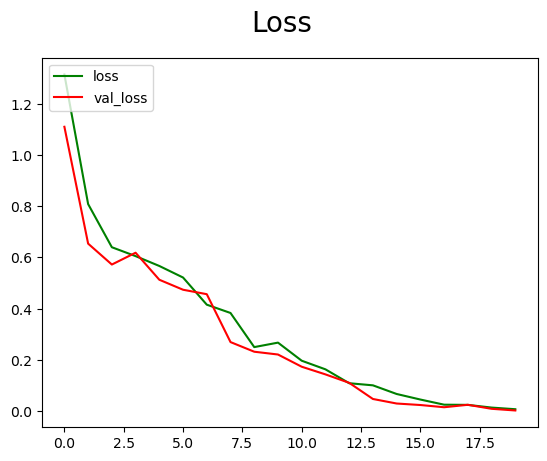

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

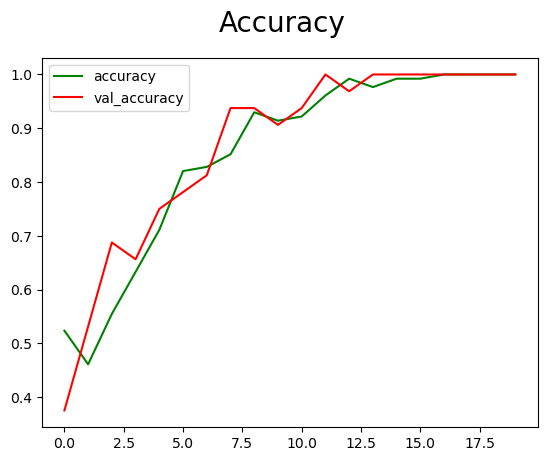

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate the performance of Model

In [77]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-09-26 01:00:51.272433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 98ms/step


In [81]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy: 1.0


## Testing Model Unseen Data

In [82]:
import cv2

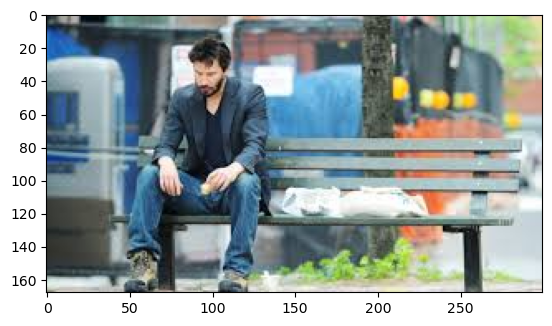

In [107]:
img = cv2.imread('sad_test.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

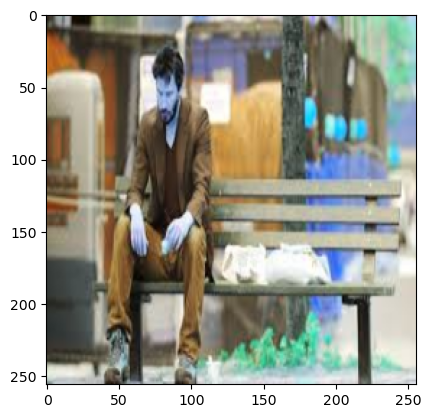

In [108]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
# Prediction done by creating a batch using numpy
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 14ms/step


In [110]:
yhat

array([[0.94051725]], dtype=float32)

In [111]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad


## Save The Model

In [112]:
from tensorflow.keras.models import load_model

In [113]:
model.save(os.path.join('models', 'happysadmodel.h5'))

/home/daphe/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [115]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [116]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


In [117]:
if yhat_new > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is sad
